In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, make_scorer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Encoding Categorical Values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField']
encoder = LabelEncoder()
df[categorical_column] = df[categorical_column].apply(encoder.fit_transform)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Define Features and Target
Y = df['Attrition']
X = df.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [9]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [10]:
# Decision Tree Function
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth=5):

    # train model
    dt = DecisionTreeClassifier(random_state=0, max_depth=my_depth, criterion='entropy')
    dt.fit(X_train, Y_train)

    # test model 
    Y_pred = dt.predict(X_test)

    # metrics
    print('Accuracy = ', accuracy_score(Y_test, Y_pred))
    print('F1 Score = ', f1_score(Y_test, Y_pred))
    print('Precision = ', precision_score(Y_test, Y_pred))
    print('Recall = ', recall_score(Y_test, Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

    # text representation of decision tree
    features = X_train.columns.tolist()
    text_representation = export_text(dt, feature_names=features)
    print('------------ Text Representation of Decision Tree ----------')
    print(text_representation)

    # plot decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(dt, feature_names=features, class_names=['No', 'Yes'], filled=True, fontsize=10)
    plt.title(f"Decision Tree (max_depth={my_depth})", fontsize=16)
    plt.show()

    return dt

Accuracy =  0.8605442176870748
F1 Score =  0.36923076923076925
Precision =  0.5454545454545454
Recall =  0.27906976744186046
Confusion Matrix:
 [[241  10]
 [ 31  12]]
------------ Text Representation of Decision Tree ----------
|--- OverTime <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- HourlyRate <= 55.50
|   |   |   |--- EnvironmentSatisfaction <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- EnvironmentSatisfaction >  3.50
|   |   |   |   |--- class: 0
|   |   |--- HourlyRate >  55.50
|   |   |   |--- MaritalStatus <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- MaritalStatus >  0.50
|   |   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- NumCompaniesWorked <= 4.50
|   |   |   |--- WorkLifeBalance <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- WorkLifeBalance >  1.50
|   |   |   |   |--- class: 0
|   |   |--- NumCompaniesWorked >  4.50
|   |   |   |--- Age <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  37.50
|   | 

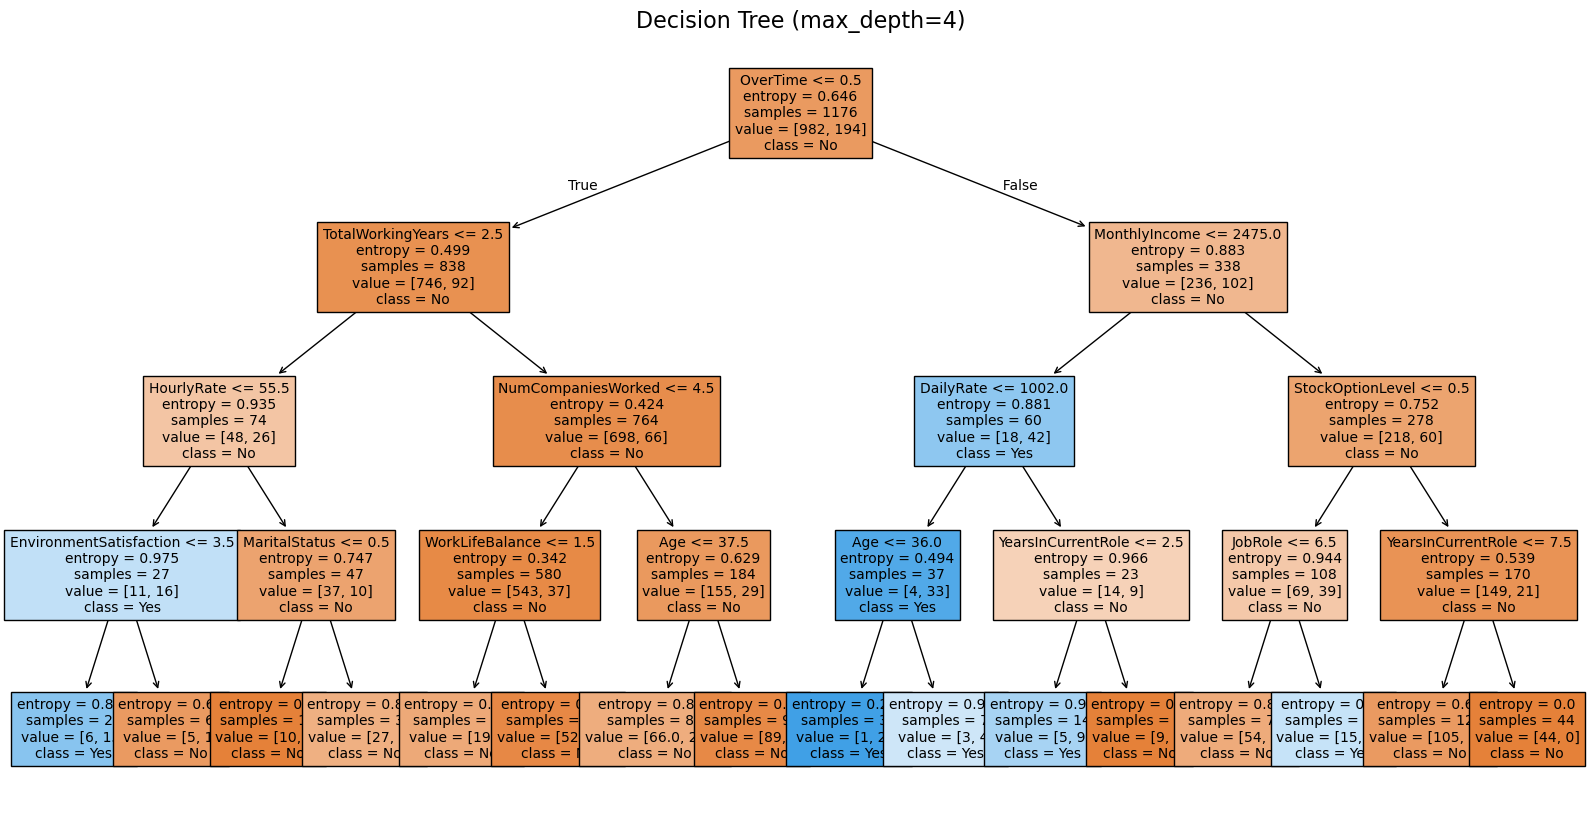

In [11]:
# Train and visualize
dt_model = decision_tree_maker(X_train, y_train, X_test, y_test, 4)

In [12]:
# Feature Importance
def get_feature_importance(dt, X_train):
    importances = dt.feature_importances_
    for importance, name in sorted(zip(importances, X_train.columns), reverse=True):
        print(name, importance)

    plt.figure(figsize=(10, 5))
    plt.bar(X_train.columns, importances, align='center')
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance for Decision Tree")
    plt.show()

OverTime 0.20702283372437602
MonthlyIncome 0.17686077785498658
TotalWorkingYears 0.12107495106564786
YearsInCurrentRole 0.09120938941101778
StockOptionLevel 0.07539604065294833
Age 0.07290657917901759
DailyRate 0.05993534699744536
NumCompaniesWorked 0.04820899530572964
JobRole 0.039793817497534974
HourlyRate 0.037680649915432185
WorkLifeBalance 0.029976622428717695
EnvironmentSatisfaction 0.020824807690356207
MaritalStatus 0.01910918827678994
YearsWithCurrManager 0.0
YearsSinceLastPromotion 0.0
YearsAtCompany 0.0
TrainingTimesLastYear 0.0
RelationshipSatisfaction 0.0
PerformanceRating 0.0
PercentSalaryHike 0.0
MonthlyRate 0.0
JobSatisfaction 0.0
JobLevel 0.0
JobInvolvement 0.0
Gender 0.0
EducationField 0.0
Education 0.0
DistanceFromHome 0.0
Department 0.0
BusinessTravel 0.0


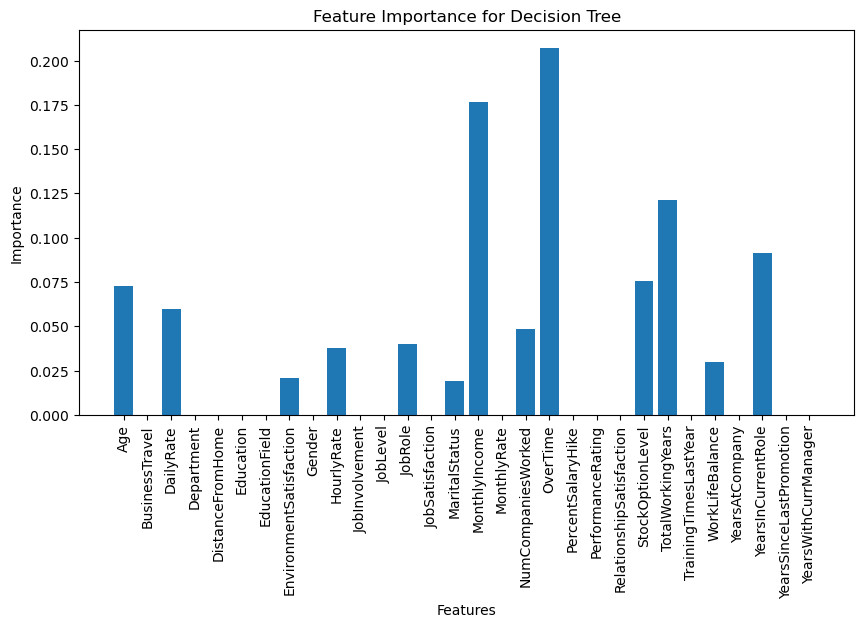

In [13]:
get_feature_importance(dt_model, X_train)

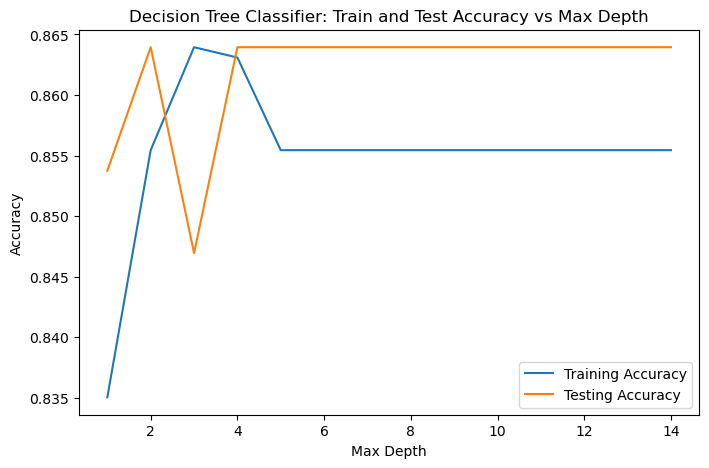

In [14]:
# Accuracy vs Depth
dt_train_accuracy = []
dt_test_accuracy = []

for i in np.arange(1, 15):
    param_grid = {'criterion': ['entropy', 'gini'], 'max_depth': [i], 
                  'max_leaf_nodes': [5, 10, 20, 50, 100], 'random_state': [0]}
    dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_pred = dt.predict(X_test)
    dt_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    dt_test_accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1, 15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1, 15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.show()

In [15]:
# GridSearchCV Function
def gcv(X_train, Y_train, X_test, Y_test):
    scoring = make_scorer(accuracy_score)
    max_depth = [int(x) for x in np.linspace(2, 15, num=10)]

    g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                        param_grid={'criterion': ['gini', 'entropy'],
                                    'max_depth': max_depth,
                                    'max_features': ['sqrt', 'log2'],
                                    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                                    'min_samples_split': range(2, 10),
                                    'max_leaf_nodes': [5, 10, 20, 50, 100]},
                        scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, Y_train)
    print("Best Params:", g_cv.best_params_)

    # train new model with best params
    dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
    Y_pred = dt_classifier.predict(X_test)
    print('Accuracy = ', accuracy_score(Y_test, Y_pred))
    print('F1 Score = ', f1_score(Y_test, Y_pred))
    print('Precision = ', precision_score(Y_test, Y_pred))
    print('Recall = ', recall_score(Y_test, Y_pred))
    return dt_classifier, g_cv.best_params_

In [16]:
# Run Grid Search CV
dt_classifier, best_params_raw = gcv(X_train, y_train, X_test, y_test)

Best Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy =  0.8469387755102041
F1 Score =  0.3076923076923077
Precision =  0.45454545454545453
Recall =  0.23255813953488372


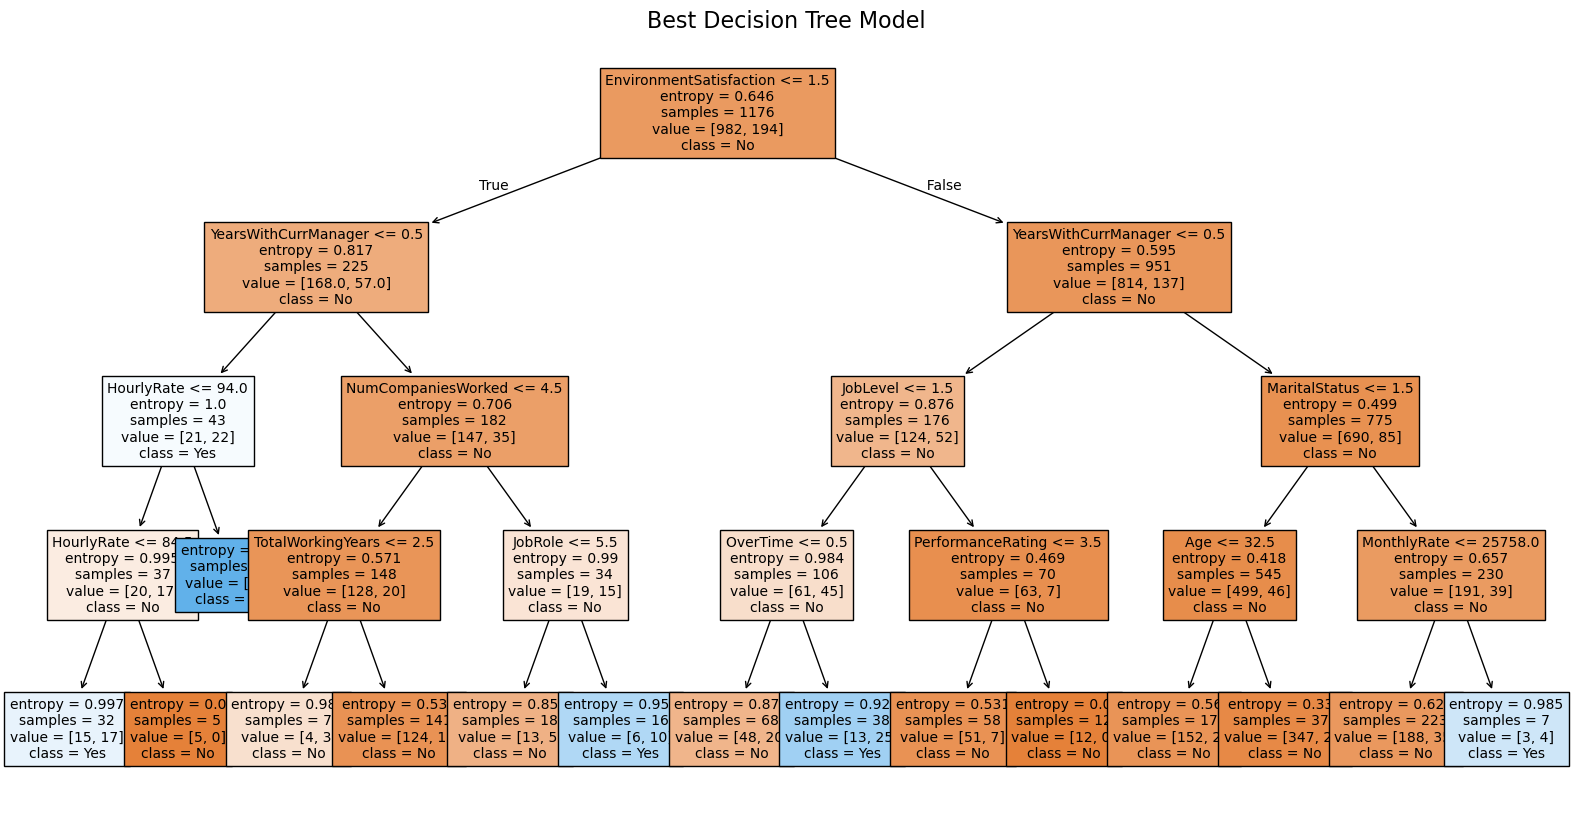

In [17]:
# Visualizing Best Model
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Best Decision Tree Model", fontsize=16)
plt.show()

YearsWithCurrManager 0.3168200263509086
JobLevel 0.14578781892042397
EnvironmentSatisfaction 0.08918068561736199
NumCompaniesWorked 0.08832909943332475
OverTime 0.08216560798327228
MaritalStatus 0.06927258325573489
HourlyRate 0.061387084982517715
Age 0.04277850546723458
MonthlyRate 0.037084401051648605
JobRole 0.0260626270254317
TotalWorkingYears 0.023913717591383225
PerformanceRating 0.01721784232075756
YearsSinceLastPromotion 0.0
YearsInCurrentRole 0.0
YearsAtCompany 0.0
WorkLifeBalance 0.0
TrainingTimesLastYear 0.0
StockOptionLevel 0.0
RelationshipSatisfaction 0.0
PercentSalaryHike 0.0
MonthlyIncome 0.0
JobSatisfaction 0.0
JobInvolvement 0.0
Gender 0.0
EducationField 0.0
Education 0.0
DistanceFromHome 0.0
Department 0.0
DailyRate 0.0
BusinessTravel 0.0


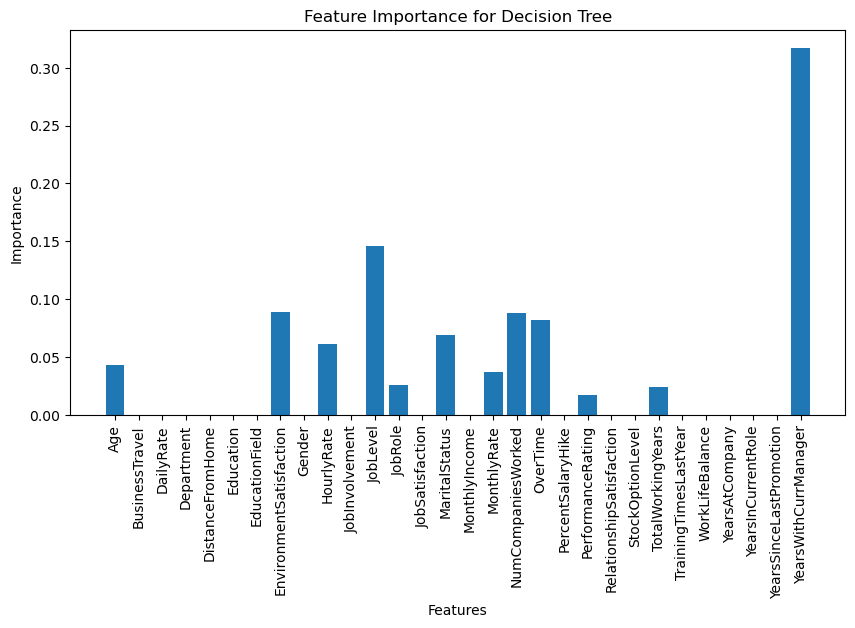

In [18]:
# Feature Importance for Best Model
get_feature_importance(dt_classifier, X_train)

In [19]:
# K-Fold Cross Validation
def cross_validation(model, X, y, my_cv=5):
    scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print(scores)
    print("Accuracy: ", np.mean(scores['test_accuracy']))
    print("Precision: ", np.mean(scores['test_precision']))
    print("Recall: ", np.mean(scores['test_recall']))
    print("F1 Score: ", np.mean(scores['test_f1']))

In [20]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.00521827, 0.00701284, 0.00069809, 0.00240159, 0.00496578]), 'score_time': array([0.        , 0.00647902, 0.00605893, 0.00091386, 0.00302219]), 'test_accuracy': array([0.82653061, 0.8537415 , 0.84353741, 0.83333333, 0.83673469]), 'test_precision': array([0.4       , 0.85714286, 0.53846154, 0.46666667, 0.45454545]), 'test_recall': array([0.125     , 0.125     , 0.14893617, 0.29787234, 0.10638298]), 'test_f1': array([0.19047619, 0.21818182, 0.23333333, 0.36363636, 0.17241379])}
Accuracy:  0.8387755102040817
Precision:  0.5433633033633034
Recall:  0.16063829787234044
F1 Score:  0.23560829974623082
